In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import random

crossover_probability = 0.9
mutation_probability = 0.1
population_size = 400
elite_size = 20
load_capacity = 30
number_generations = 100

In [6]:
objects = pd.DataFrame([
    (15, 15, 'Saco de dormir'),
    (3, 7, 'Corda'),
    (2, 10, 'Canivete'),
    (5, 5, 'Tocha'),
    (9, 8, 'Garrafa'),
    (20, 17, 'Comida'),    
], columns=['peso', 'valor', 'item'])

number_genes = len(objects)

In [7]:
def individual():
    individual = [random.randint(0, 1) for i in range(number_genes)]
    validate(individual)
    return individual

def validate(individual):
    load = calculate_load(individual)
    less_position = 0
    values = sorted(objects['valor'])
    while (load > load_capacity):
        load = 0
        less = values[less_position]
        index = objects['valor'].values.tolist().index(less)
        individual[index] = 0
        less_position += 1
        load = calculate_load(individual)

def create_population():
    return [individual() for i in range(population_size)]

def fitness(individual):
    fitness = 0
    for i in range(len(individual)):
        if individual[i] == 1:
            fitness += objects.at[i, 'valor']
    return fitness

def calculate_load(individual):
    load = 0
    for i in range(len(individual)):
        if individual[i] == 1:
            load += objects.at[i, 'peso']
    return load

def selection_and_crossover(population):
    scored = sort_population(population)
    population = scored
    elite = population[(len(population) - elite_size):]
    for i in range(len(population) - elite_size):
        if (random.random() <= crossover_probability):
            point = random.randint(1, number_genes - 1)
            parents = random.sample(elite, 2)
            population[i][:point] = parents[0][:point]
            population[i][point:] = parents[1][point:]
            validate(population[i])
    return population

def mutation(population):
    for i in range(len(population) - elite_size):
        if (random.random() <= mutation_probability):
            point = random.randint(0, number_genes - 1)
            new_value = random.randint(0, 1)
            while (new_value == population[i][point]):
                new_value = random.randint(0, 1)
            population[i][point] = new_value
            validate(population[i])
    return population

def sort_population(population):
    return [i[1] for i in sorted([(fitness(j), j) for j in population])]


---------------------------------------------
Algoritmo da Mochila
---------------------------------------------
Número de genes dos indivíduos: 6

Taxa de crossover: 90.0%

Taxa de mutação: 10.0%

Tamanho da população: 400 indivíduos

Elitismo: 20 indivíduos

Peso máximo suportado pela mochila: 30
---------------------------------------------


Elite inicial:

Indivíduo: [1, 1, 1, 1, 0, 0] | Valor: 37 | Peso: 25

Indivíduo: [1, 1, 1, 1, 0, 0] | Valor: 37 | Peso: 25

Indivíduo: [1, 1, 1, 1, 0, 0] | Valor: 37 | Peso: 25

Indivíduo: [1, 1, 1, 1, 0, 0] | Valor: 37 | Peso: 25

Indivíduo: [1, 1, 1, 1, 0, 0] | Valor: 37 | Peso: 25

Indivíduo: [1, 1, 1, 1, 0, 0] | Valor: 37 | Peso: 25

Indivíduo: [0, 1, 1, 1, 0, 1] | Valor: 39 | Peso: 30

Indivíduo: [0, 1, 1, 1, 0, 1] | Valor: 39 | Peso: 30

Indivíduo: [0, 1, 1, 1, 0, 1] | Valor: 39 | Peso: 30

Indivíduo: [1, 1, 1, 0, 1, 0] | Valor: 40 | Peso: 29

Indivíduo: [1, 1, 1, 0, 1, 0] | Valor: 40 | Peso: 29

Indivíduo: [1, 1, 1, 0, 1, 0] | Valor: 40 

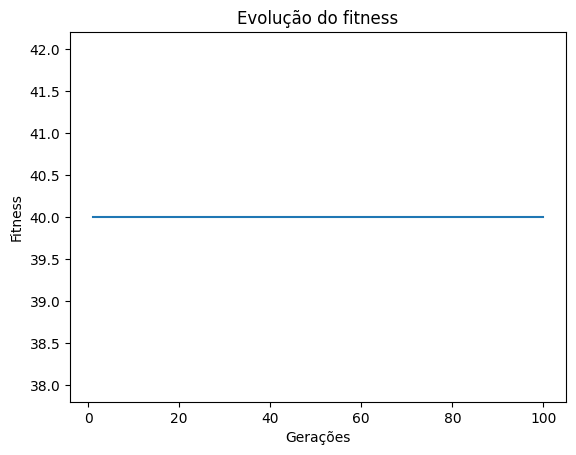

In [8]:
print('-' * 45)
print('Algoritmo da Mochila')
print('-' * 45)
print('Número de genes dos indivíduos: {}\n'.format(number_genes))
print('Taxa de crossover: {}%\n'.format(crossover_probability * 100))
print('Taxa de mutação: {}%\n'.format(mutation_probability * 100))
print('Tamanho da população: {} indivíduos\n'.format(population_size))
print('Elitismo: {} indivíduos\n'.format(elite_size))
print('Peso máximo suportado pela mochila: {}'.format(load_capacity))
print('-' * 45)
print('\n')
population = create_population()
elite = [None] * len(population)
elite = sort_population(population)[(len(population) - elite_size):]
print('Elite inicial:\n')
for i in elite:
    print('Indivíduo: {} | Valor: {} | Peso: {}\n'.format(
        i, fitness(i), calculate_load(i)))
print('Realizando o crossover e mutação para {} gerações...\n'.format(
    number_generations))
generations = []
generation_fitness = []
for i in range(number_generations):
    generations.append(i + 1)
    generation_fitness.append(
        fitness(sort_population(population)[population_size - 1]))
    population = selection_and_crossover(population)
    population = mutation(population)
print('Elite final:\n')
elite = sort_population(population)[(len(population) - elite_size):]
for i in elite:
    print('Indivíduo: {} | Valor: {} | Peso: {}\n'.format(
        i, fitness(i), calculate_load(i)))

plt.plot(generations, generation_fitness)
plt.title('Evolução do fitness')
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.show()